<a href="https://colab.research.google.com/github/alexandrufrunza/Psihopedagogie/blob/main/Psihopedagogie_Lectia_nr_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tablouri bidimensionale (Matrice) în C++



*   În C++, matricele reprezintă o structură de date standard, folosită pentru a stoca o colecție de date de același tip, organizate pe linii și coloane.
*   O matrice este extinderea la două dimensiuni a unui vector, de unde și numele alternativ de tablou bidimensional.
*   Matricele pot fi privite drept vectori cu elemente de tip vector.

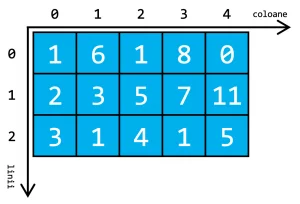



# Declararea matricelor în C++

***tip nume[MMAX][NMAX];***



*   MMAX este numărul maxim de linii, iar NMAX este numărul maxim de coloane.
*   În urma acestei instrucțiuni, calculatorul va aloca o secvență liniară de memorie, formată din MMAX * NMAX elemente de tipul tip.
*   Calculatorul percepe matricele sub formă liniară

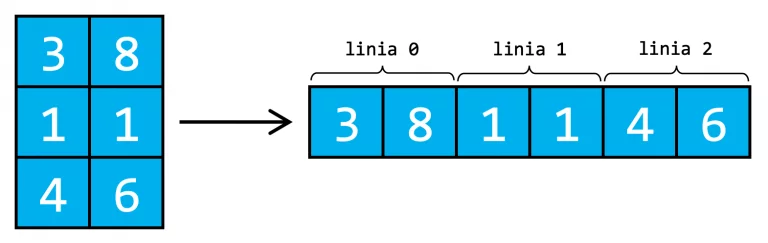



# Accesarea elementelor unei matrice în C++

*  Pentru a accesa elementul de pe linia i și coloana j a unei matrice mat, folosim sintaxa ***mat[i][j]***.
*  Având în vedere că, în memoria calculatorului, matricea este stocată liniar, programul determină mai întâi, în funcție de {i}i și {j}j, poziția elementului căutat în forma liniarizată a matricei, iar abia apoi accesează acel element.
*  Formula este $i \cdot n + j$ și se poate deduce foarte ușor: Până la linia ${i}$ avem deja ${i}$ linii complete, fiecare având ${n}$ elemente (de aici $i \cdot n$), iar pe linia curentă avem deja ${j}$ elemente.

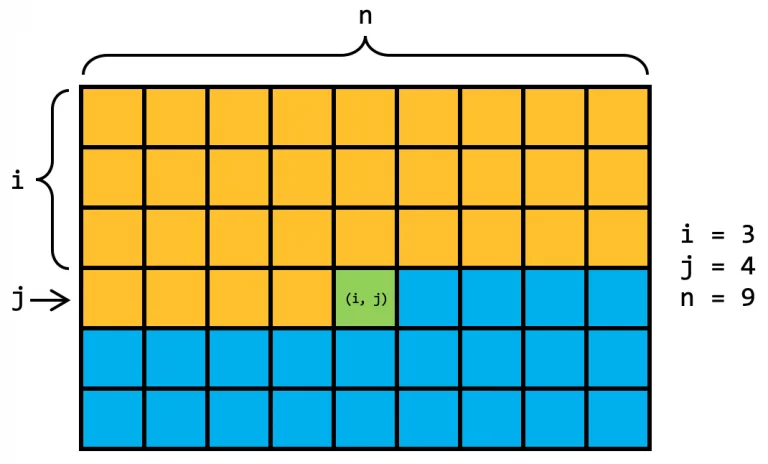

# Inițializarea matricelor în C++
*  Atunci când sunt declarate global, matricele sunt inițializate cu zero, iar atunci când sunt declarate local, cu valori aleatoare de pe stivă.
*  Dacă dorim să le inițializăm cu anumite valori, procedăm cam ca la inițializarea vectorilor:

In [ ]:
%%writefile initialize.cpp

#include <iostream> 
using namespace std;

int mat[5][7] = {
    {6, 1, 8},
    {1, 2, 3, 4},
    {},
    {3, 1}
};

int main(){                       
   cout << mat[0][0];
   return 0;                       
}            

In [ ]:
%%script bash
g++ -o initialize initialize.cpp
ls -laX
./initialize

*  Liniile pentru care nu am precizat niciun set de valori, precum și elementele lipsă din vectorii de lungime mai mică decât numărul de coloane ale matricei vor fi inițializate cu zero, indiferent de scopul matricei (local sau global)

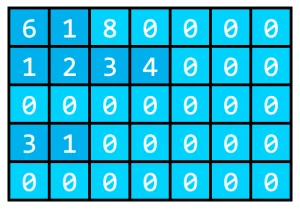

*  Specificarea primei dimensiuni a matricei este opțională atunci când o inițializăm. Compilatorul va considera că matricea are atâtea linii câți vectori am enumerat între acolade.
*  A doua dimensiune însă – numărul de coloane – este obligatorie. Compilatorul are nevoie de ${n}$ pentru a-l putea înlocui în formula $i \cdot n + j$, folosită la accesarea de elemente ale matricei. Astfel, compilatorul poate completa matricea chiar în timp ce parsează declarația ei.

# Parcurgerea unei matrice în C++
Pentru a parcurge o matrice linie cu linie și coloană cu coloană (în cadrul fiecărei linii) folosim două for-uri imbricate și doi iteratori: $i$ pentru linie și $j$ pentru coloană.

In [ ]:
%%writefile parcurgere.cpp

#include <iostream>
using namespace std;

#define MMAX 314 // numărul maxim de linii
#define NMAX 618 // numărul maxim de coloane

int m, n; // numărul de linii și numărul de coloane
int mat[MMAX][NMAX]; // matricea

int main() {
    int i, j; // iteratorii pentru linie și coloană
    m = 2;
    n = 3;

    // citirea elementelor matricei
    for (i = 0; i < m; i++) // linie cu linie
        for (j = 0; j < n; j++) // coloană cu coloană
            mat[i][j]=3 + i + j;

    // afișarea elementelor matricei
    for (i = 0; i < m; i++) { // linie cu linie
        for (j = 0; j < n; j++) // coloană cu coloană
            cout << mat[i][j] << ' ';
        cout << '\n';
    }
    return 0;
}

In [ ]:
%%script bash
g++ -o parcurgere parcurgere.cpp
./parcurgere

# Matrice pătratice în C++



*   O matrice se numește pătratică dacă numărul său de linii este egal cu cel de coloane.
*   Astfel, se pot defini două noțiuni importante: *diagonala principală* și *diagonala secundară*.
*   Diagonala principală a unei matrice pătratice pornește din colțul stânga-sus și se termină în cel din dreapta-jos, conținând elementele de coordonate ${(i, j)}$ cu proprietatea ${i = j}$.
*   Diagonala secundară pornește din colțul dreapta-sus și se termină în stânga-jos, conținând elementele pentru care ${i + j = n - 1}$.

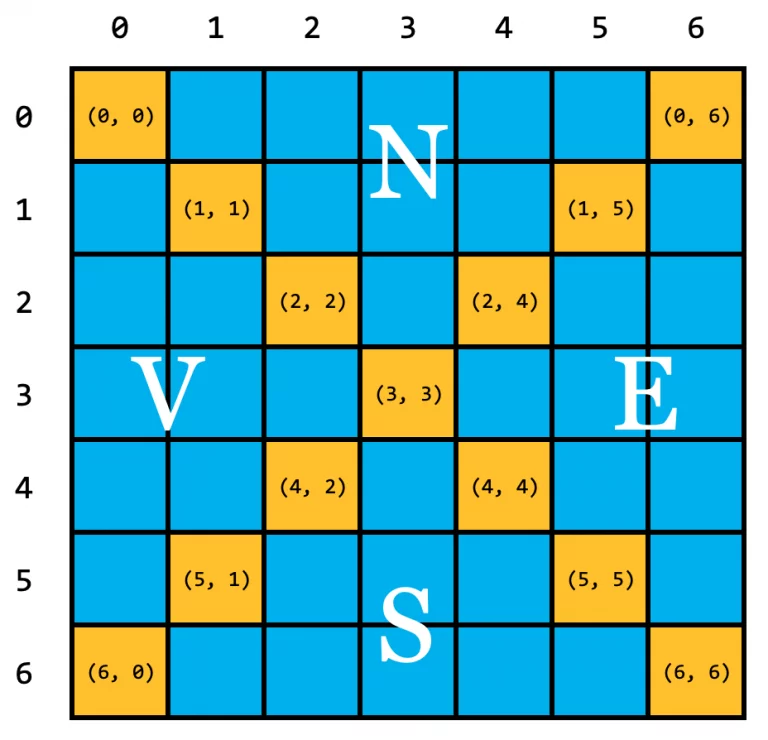

# La ce putem folosi o matrice?

Rolul general al unei matrice este cel de a reține date aferente tuturor punctelor din plan ${(x, y)}$ cu $0 \le x \lt m$ și $0 \le y \lt n$.

## Harta unei livezi

**Enunț:** Paftenie avea o livadă cu pomi fermecați. Fiind pasionat de matematică, Paftenie a plantat în mod riguros pomii pe ${m}$ rânduri dispuse paralel, iar pe fiecare rând a plantat ${n}$ pomi echidistanți. Fiecare pom poate fi identificat prin rândul pe care se află și poziția sa în cadrul rândului respectiv. Pomii pot fi de trei feluri: meri, peri sau vișini.

**Soluție:** Se dă o matrice de dimensiuni m \times nm×n cu elemente din mulțimea $\{1, 2, 3\}$.

## Stocarea unei imagini

Un exemplu similar este cel în care vrem să stocăm o imagine alb-negru. Pentru fiecare pixel de coordonate ${(x, y)}$ putem reține nuanța sa de alb, pe o scară de la ${0}$ la ${255}$. Dacă imaginea ar fi coloră, atunci ar trebui să reținem câte trei numere pentru fiecare pixel – nuanțele de roșu, verde și albastru.

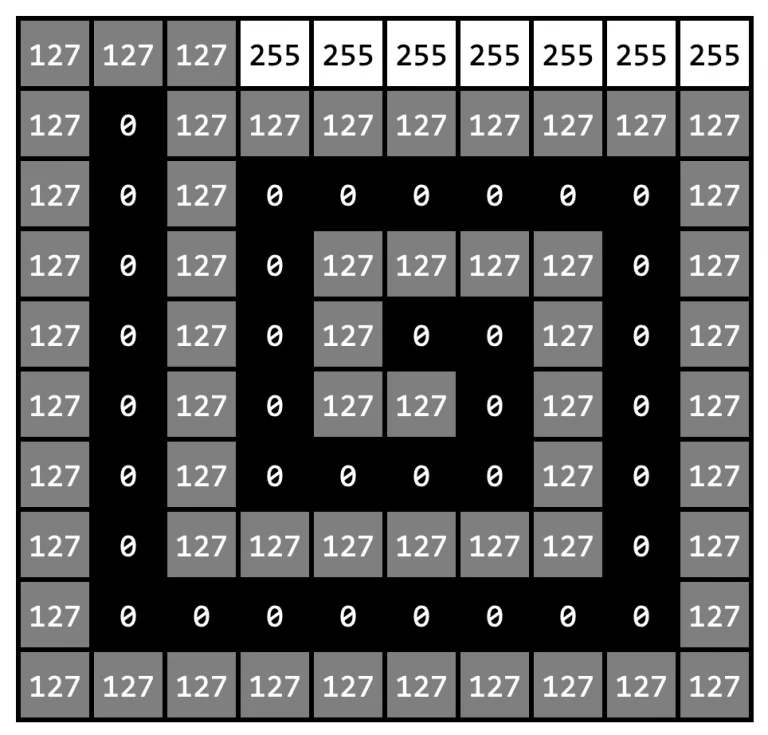



## O tablă de șah
Un alt context în care matricele se dovedesc utile este simularea unui meci de șah. Putem modela tabla de joc drept o matrice pătratică cu ${8}$ linii și ${8}$ coloane. Valoarea unui element ar putea fi ${0}$ dacă pătrățelul respectiv este liber, sau $\pm k±k$, unde ${k}$ este un număr natural nenul ce reprezintă codul piesei respective (${1}$ pentru pion, ${2}$ pentru cal etc.), iar semnul se referă la culoarea piesei (alb sau negru).

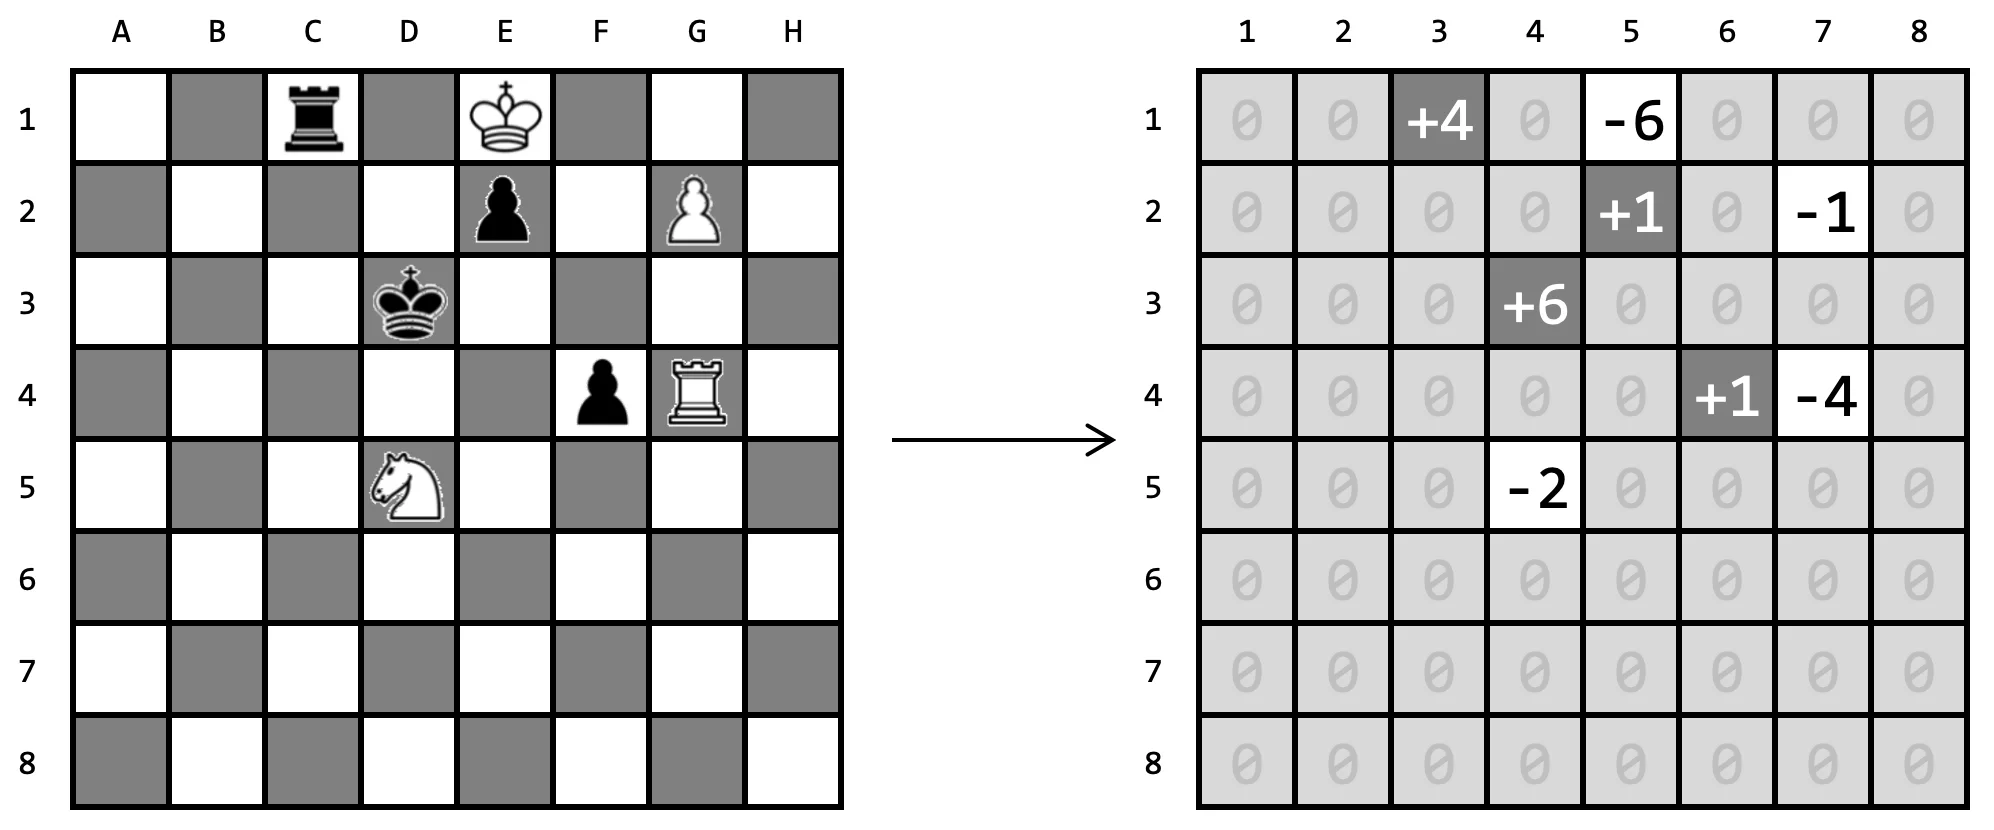

## Matrice matematică

În matematică, matricele au foarte multe aplicații, putându-ne ajuta să rezolvăm în ${O(n^3)}$ sisteme de ecuații liniare și să generăm în $O(\log n)$ anumiți termeni din Șirul lui Fibonacci.

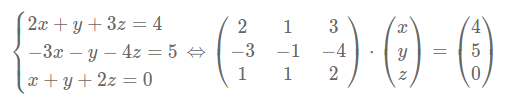

# Probleme

# Problema 1
Se dă o matrice $\mathrm{mat}$ cu $m \ge 1$ linii și $n \ge 1$ coloane, având toate elementele distincte. Să se interschimbe liniile pe care se află cel mai mic și respectiv cel mai mare element din matrice.



**Soluție:**
1.   Primul pas este să găsim elementul minim (mn) și elementul maxim (mx) din matrice, precum și liniile pe care se află acestea (linMin și linMax). Pentru a inițializa aceste variabile, ne vom folosi de primul element al matricei (mat[1][1]), pe care îl vom considera deocamdată atât minim, cât și maxim.
2.   Următorul pas este să parcurgem matricea, actualizând la fiecare pas minimul și maximul de până acum, folosindu-ne de elementul curent. Orice parcurgere este bună, așa că o vom folosi pe cea mai simplă – de sus în jos și de la stânga la dreapta.
3.   La final, interschimbăm efectiv cele două linii linMin și linMax. Iterăm indicele de coloană j de la 1 la n, la fiecare pas făcând swap între mat[linMin][j] și mat[linMax][j].



In [ ]:
%%writefile problema1.cpp

#include <iostream> 
using namespace std;

int m = 3;
int n = 3;

int mat[3][3] = {
    {6, 7, 8},
    {1, 2, 3},
    {5, 4, 9}
};

int mn = mat[1][1], linMin = 1;
int mx = mat[1][1], linMax = 1;
int main(){    
    int i, j;
    for (int i = 1; i <= m; i++)
        for (int j = 1; j <= n; j++) {
            if (mat[i][j] < mn) mn = mat[linMin = i][j];
            if (mat[i][j] > mx) mx = mat[linMax = i][j];
        }

    for (int j = 1; j <= n; j++) {
        int aux = mat[linMin][j];
        mat[linMin][j] = mat[linMax][j];
        mat[linMax][j] = aux;
    }
                   
    for (i = 0; i < m; i++) {
        for (j = 0; j < n; j++)
            cout << mat[i][j] << ' ';
        cout << '\n';
    }
    return 0;                       
}    

In [ ]:
%%script bash
g++ -o problema1 problema1.cpp
./problema1

## Problema 2
Se dă o matrice $\mathrm{mat}$ cu $m \ge 1$ linii și $n \ge 1$ coloane. Să se permute circular coloanele matricei cu o poziție la stânga.

**Soluție:** A permuta coloanele matricei cu o poziție la stânga este același lucru cu a permuta fiecare linie a matricei cu o poziție la stânga. Prin urmare, vom permuta circular, pe rând, fiecare linie a matricei, ca și cum ar fi un vector.

In [ ]:
%%writefile problema2.cpp

#include <iostream> 
using namespace std;

int m = 3;
int n = 4;

int mat[3][4] = {
    {1, 2, 3, 7},
    {2, 3, 1, 7},
    {3, 1, 7, 2}
};

int main(){    
    int i, j;
    for (int i = 1; i <= m; i++) {
        int aux = mat[i][1];
        for (int j = 1; j < n; j++)
            mat[i][j] = mat[i][j + 1];
        mat[i][n] = aux;
    }
                   
    for (i = 0; i < m; i++) {
        for (j = 0; j < n; j++)
            cout << mat[i][j] << ' ';
        cout << '\n';
    }
   return 0;                       
}    

In [ ]:
%%script bash
g++ -o problema2 problema2.cpp
./problema2

# Temă

1.   Se dă o matrice $\mathrm{mat}$ cu $m \ge 1$ linii și $n \ge 1$ coloane. Să se rotească cu $90^{\text{o}}$ în sensul acelor de ceasornic matricea dată.
2.   Se dă o matrice $\mathrm{mat}$ cu $m \ge 1$ linii și $n \ge 1$ coloane. De asemenea, se dau ${q}$ numere întregi. Pentru fiecare dintre acestea, să se determine dacă apare pe fiecare linie a matricei.
3.   Se dă o matrice $\mathrm{mat}$ cu $m \ge 1$ linii și $n \ge 1$ coloane. Să se determine câte elemente ale matricei au toți vecinii numere impare. Vecinii elementului $\mathrm{mat}[i][j]$ sunt $\mathrm{mat}[i - 1][j]$, $\mathrm{mat}[i + 1][j]$, $\mathrm{mat}[i][j - 1]$ și $\mathrm{mat}[i][j + 1]$ (dacă elementele acestea există, adică dacă se află în interiorul matricei).
